# Regression models

In [1]:
import numpy as np
import pandas as pd

In [3]:
coke = pd.read_excel('D:/ExcelR/A18 forecasting/CocaCola_Sales_Rawdata.xlsx')

In [4]:
coke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [5]:
coke.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [18]:
quarters = ['Q1','Q2','Q3','Q4']

In [19]:
n=coke['Quarter'][0]

In [20]:
n

'Q1_86'

In [21]:
n[0:2]

'Q1'

In [22]:
coke['quarters']=n[0:2]

In [23]:
coke.head()

,Quarter,Sales,quarters
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q1
2,Q3_86,2533.804993,Q1
3,Q4_86,2154.962997,Q1
4,Q1_87,1547.818996,Q1


In [25]:
for i in range(42):
    n=coke['Quarter'][i]
    coke.loc[i,'quarters']=n[0:2]

In [26]:
coke.head(8)

,Quarter,Sales,quarters
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4


In [27]:
coke = pd.get_dummies(data=coke,columns=['quarters'])

In [28]:
coke.head()

,Quarter,Sales,quarters_Q1,quarters_Q2,quarters_Q3,quarters_Q4
0,Q1_86,1734.827000,1,0,0,0
1,Q2_86,2244.960999,0,1,0,0
2,Q3_86,2533.804993,0,0,1,0
3,Q4_86,2154.962997,0,0,0,1
4,Q1_87,1547.818996,1,0,0,0


In [29]:
t = np.arange(1,43)
coke['t'] = t
coke['t_square'] = coke['t']*coke['t']

In [30]:
coke.head()

,Quarter,Sales,quarters_Q1,quarters_Q2,quarters_Q3,quarters_Q4,t,t_square
0,Q1_86,1734.827000,1,0,0,0,1,1
1,Q2_86,2244.960999,0,1,0,0,2,4
2,Q3_86,2533.804993,0,0,1,0,3,9
3,Q4_86,2154.962997,0,0,0,1,4,16
4,Q1_87,1547.818996,1,0,0,0,5,25


In [31]:
log_Sales = np.log(coke['Sales'])
coke['log_Sales'] = log_Sales
coke.head()

,Quarter,Sales,quarters_Q1,quarters_Q2,quarters_Q3,quarters_Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,1,0,0,0,5,25,7.344602


<AxesSubplot:>

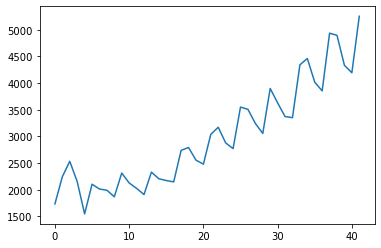

In [32]:
train = coke.head(34)
test = coke.tail(8)
coke.Sales.plot()

In [33]:
import statsmodels.formula.api as smf

In [34]:
#linear model
linear = smf.ols('Sales~t',data=train).fit()
predlin = pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmselin = np.sqrt((np.mean(np.array(test['Sales'])-np.array(predlin))**2))
rmselin

590.1615528800276

In [35]:
#quadratic model
quad = smf.ols('Sales~t+t_square',data=train).fit()
predquad = pd.Series(quad.predict(pd.DataFrame(test[['t','t_square']])))
rmsequad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(predquad))**2))
rmsequad

437.7455637558559

In [36]:
#exponential model
expo = smf.ols('log_Sales~t',data=train).fit()
predexp = pd.Series(expo.predict(pd.DataFrame(test['t'])))
rmseexpo = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

564.9850937274292

In [38]:
#additive seasonality
additive = smf.ols('Sales~quarters_Q1+quarters_Q2+quarters_Q3+quarters_Q4',data=train).fit()
predadd = pd.Series(additive.predict(pd.DataFrame(test[['quarters_Q1','quarters_Q2','quarters_Q3','quarters_Q4']])))
rmseadd = np.sqrt(np.mean((np.array(test['Sales'])-np.array(predadd))**2))
rmseadd

1870.1899069853293

In [39]:
#additive seasonality with linear trend
addlinear = smf.ols('Sales~t+quarters_Q1+quarters_Q2+quarters_Q3+quarters_Q4',data=train).fit()
predaddlinear = pd.Series(addlinear.predict(pd.DataFrame(test[['t','quarters_Q1','quarters_Q2','quarters_Q3','quarters_Q4']])))
rmseaddlinear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

631.8304957862767

In [40]:
#additive seasonality with quadratic trend
addquad = smf.ols('Sales~t+t_square+quarters_Q1+quarters_Q2+quarters_Q3+quarters_Q4',data=train).fit()
predaddquad = pd.Series(addquad.predict(pd.DataFrame(test[['t','t_square','quarters_Q1','quarters_Q2','quarters_Q3','quarters_Q4']])))
rmseaddquad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(predaddquad))**2))
rmseaddquad

257.67172565362677

In [41]:
#multiplicative seasonality
mulsea = smf.ols('log_Sales~quarters_Q1+quarters_Q2+quarters_Q3+quarters_Q4',data=train).fit()
predmul = pd.Series(mulsea.predict(pd.DataFrame(test[['quarters_Q1','quarters_Q2','quarters_Q3','quarters_Q4']])))
rmsemul = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

1940.8042499186577

In [42]:
#multiplicative seasonality with linear trend
mullin = smf.ols('log_Sales~t+quarters_Q1+quarters_Q2+quarters_Q3+quarters_Q4',data=train).fit()
predmullin = pd.Series(mullin.predict(pd.DataFrame(test[['t','quarters_Q1','quarters_Q2','quarters_Q3','quarters_Q4']])))
rmsemulin = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemulin

400.42004584362434

In [43]:
#multiplicative seasonality with quadratic trend
mul_quad = smf.ols('log_Sales~t+t_square+quarters_Q1+quarters_Q2+quarters_Q3+quarters_Q4',data=train).fit()
pred_mul_quad = pd.Series(mul_quad.predict(test[['t','t_square','quarters_Q1','quarters_Q2','quarters_Q3','quarters_Q4']]))
rmse_mul_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

665.238481550648

In [47]:
summary = {'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),
           'RMSE':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}
summary = pd.DataFrame(summary)
summary.sort_values(['RMSE'])

,Model,RMSE
3,rmseaddquad,257.671726
7,rmsemulin,400.420046
8,rmsequad,437.745564
4,rmseexpo,564.985094
5,rmselin,590.161553
2,rmseaddlinear,631.830496
0,rmse_mul_quad,665.238482
1,rmseadd,1870.189907
6,rmsemul,1940.804250


# Data Driven Models

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [50]:
Coke = pd.read_excel('D:/ExcelR/A18 forecasting/CocaCola_Sales_Rawdata.xlsx')

In [51]:
t = np.arange(1,43)
Coke['t'] = t

In [52]:
Coke.head()

,Quarter,Sales,t
0,Q1_86,1734.827000,1
1,Q2_86,2244.960999,2
2,Q3_86,2533.804993,3
3,Q4_86,2154.962997,4
4,Q1_87,1547.818996,5


In [53]:
Train = Coke.head(34)
Test = Coke.tail(8)

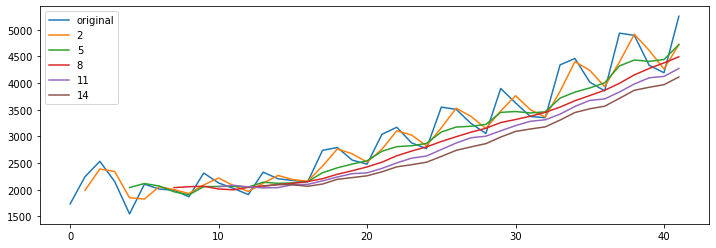

In [55]:
plt.figure(figsize=(12,4))
Coke.Sales.plot(label="original")
for i in range(2,16,3):
    Coke["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

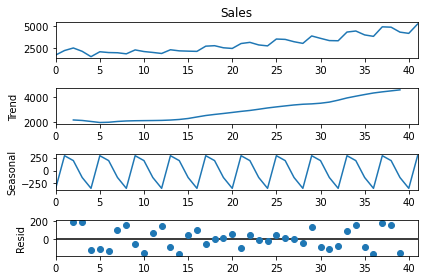

In [57]:
decompose_ts_add = seasonal_decompose(Coke.Sales,period=4)
decompose_ts_add.plot()
plt.show()

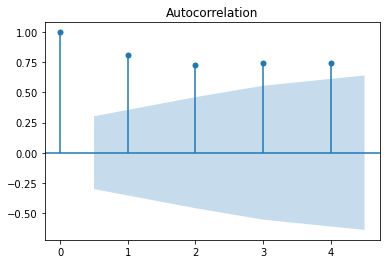

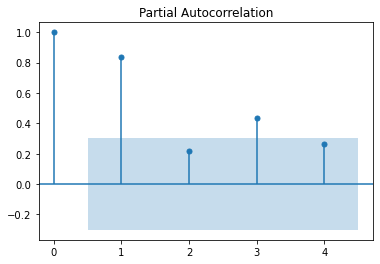

In [59]:
import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(Coke.Sales,lags=4)
tsa_plots.plot_pacf(Coke.Sales,lags=4)
plt.show()

In [60]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method

In [61]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 

C:\Users\Patel\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


20.62971720565922

### Holt method

In [62]:
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_trend=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales) 

10.874453714362792

### Holts winter exponential smoothing with additive seasonality and additive trend

In [63]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

6.73920647097165

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [64]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

6.653183071329498

# ARIMA model

In [1]:
import pandas as pd
import numpy as np

In [2]:
def build_date(row):
    element = str(row[0])
    finaldate = '19'
    yy = element[3:5]
    finaldate = finaldate+yy
    if element[1]=='1':
        finaldate = finaldate+'-01-01'
    elif element[1]=='2':
        finaldate = finaldate+'-04-01'
    elif element[1]=='3':
        finaldate = finaldate+'-07-01'
    else:
        finaldate = finaldate+'-10-01'
    return finaldate

In [3]:
cola = pd.read_excel('D:/ExcelR/A18 forecasting/CocaCola_Sales_Rawdata.xlsx')

In [4]:
for i in range(len(cola)):
    cola.loc[i,'date'] = build_date(cola.iloc[i,:])

In [5]:
cola.head()

,Quarter,Sales,date
0,Q1_86,1734.827000,1986-01-01
1,Q2_86,2244.960999,1986-04-01
2,Q3_86,2533.804993,1986-07-01
3,Q4_86,2154.962997,1986-10-01
4,Q1_87,1547.818996,1987-01-01


In [6]:
cola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
 2   date     42 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.1+ KB


In [7]:
cola.drop(columns=['Quarter'],inplace=True)

In [8]:
cola['date'] = pd.to_datetime(cola['date'])

In [9]:
cola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Sales   42 non-null     float64       
 1   date    42 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 800.0 bytes


In [10]:
cola.set_index('date',inplace=True)

In [11]:
cola.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 1986-01-01 to 1996-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   42 non-null     float64
dtypes: float64(1)
memory usage: 672.0 bytes


<AxesSubplot:xlabel='date'>

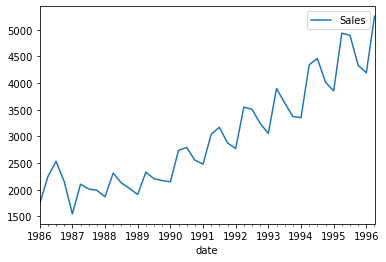

In [12]:
cola.plot()

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

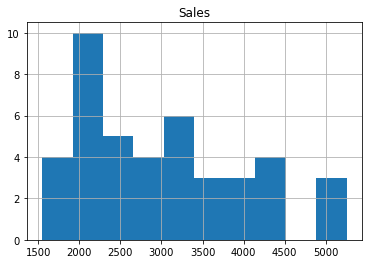

In [13]:
cola.hist()

<AxesSubplot:ylabel='Density'>

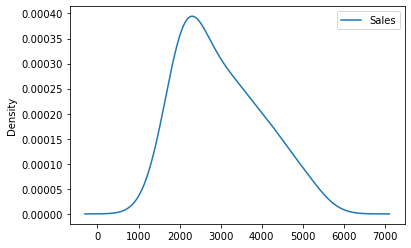

In [14]:
cola.plot(kind='kde')

In [15]:
split_point = len(cola) - 8
dataset, validation = cola[0:split_point], cola[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('cola_dataset.csv', header=False)
validation.to_csv('cola_validation.csv', header=False)

Dataset 34, Validation 8


In [16]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

In [17]:
train = read_csv('cola_dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [18]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=2148.278, Expected=2739.308
>Predicted=2739.308, Expected=2792.754
>Predicted=2792.754, Expected=2556.010
>Predicted=2556.010, Expected=2480.974
>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
>Predicted=3899.000, Expected=3629.000
>Predicted=3629.000, Expected=3373.000
>Predicted=3373.000, Expected=3352.000
>Predicted=3352.000, Expected=4342.000
RMSE: 446.062


In [19]:
from statsmodels.tsa.arima_model import ARIMA

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [20]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [21]:
import warnings
train = read_csv('cola_dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
#p_values = range(0, 5)
#d_values = range(0, 5)
#q_values = range(0, 5)
warnings.filterwarnings("ignore")
#evaluate_models(train.values, p_values, d_values, q_values)

In [22]:
# load data
train = read_csv('cola_dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

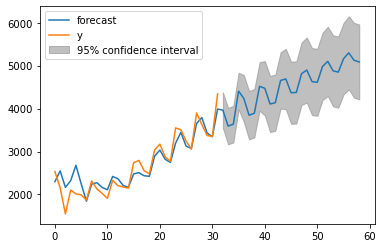

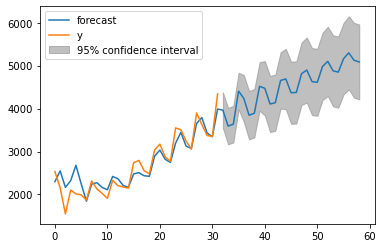

In [28]:
# fit model
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=8)[0]
model_fit.plot_predict(1, 59)

In [29]:
#Error on the test data
val=pd.read_csv('cola_validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

506.763904319507